# https://www.kaggle.com/imakash3011/customer-personality-analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
def new_marital(status):
    if status == 'Single' or status =='Married':
        return status
    if status == 'Together':
        return 'Married'
    else:
        return 'Single'
    
def new_graduation(grad):
    if grad in ['Graduation', 'PhD', 'Master']:
        return 'Graduated'
    else:
        return 'None Graduated'
    
def normal_feature(data,x,mul=1.5):
    q1 = data[x].quantile(.25)
    q3 = data[x].quantile(.85)
    
    IQR = q3 - q1
    
    IQR = IQR * mul
    
    data = data[(data[x] < q3 + IQR) & (data[x] > q1 - IQR)]
    
    return data

In [3]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.shape

(2240, 29)

In [4]:
target = 'Response'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


In [7]:
data.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [8]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot:>

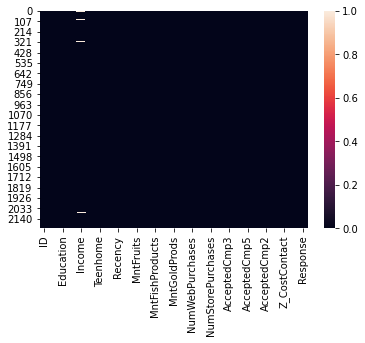

In [9]:
sns.heatmap(data.isna())

In [10]:
data['Income'].isna().sum()/len(data)

0.010714285714285714

In [11]:
data = data.dropna()

In [12]:
data.duplicated().sum()

0

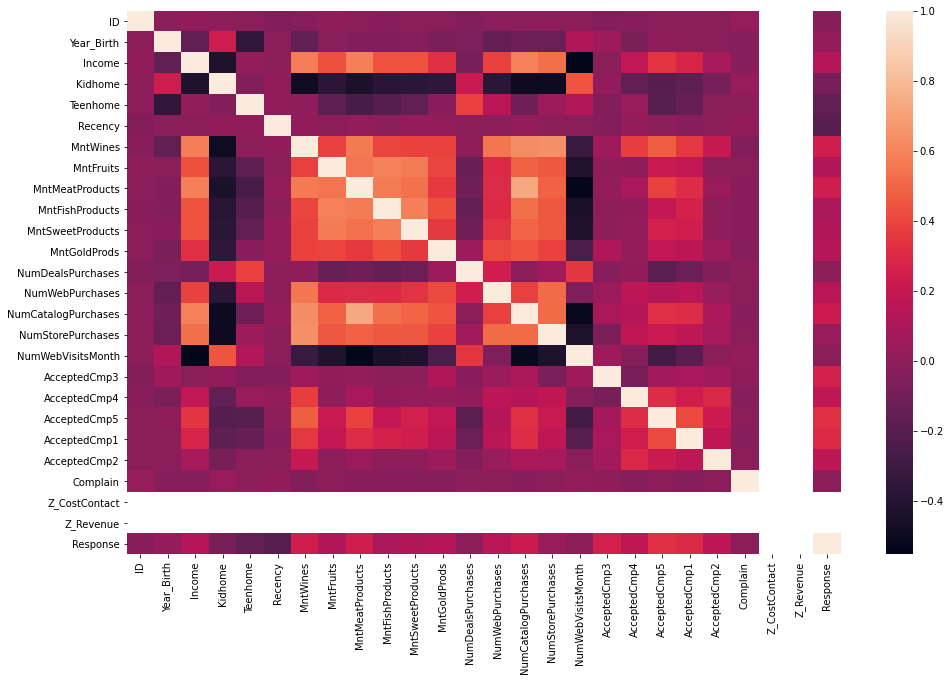

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr())
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [15]:
obj_col = data[[x for x in data.columns if data[x].dtype == 'O']]
obj_col

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

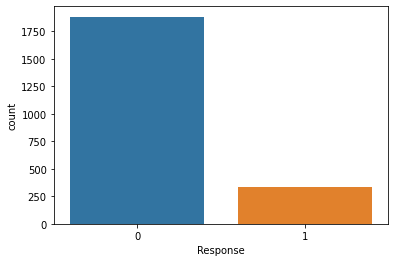

In [16]:
sns.countplot(data[target])

In [17]:
# for x in data[target].unique():
#     print(x,len(data[data[target] == 0]))

In [18]:
for i in obj_col:
    print(i,data[i].nunique(),'\n',data[i].unique())

Education 5 
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status 8 
 ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Dt_Customer 662 
 ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '31-05-2013'
 '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012' '20-02-2013'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '02-10-2013' '28-06-2014' '09-11-2012'
 '24-05-2013' '08-11-2012' '12-05-2014' '11-08-2012' '07-06-2014'
 '12-06-2013' '19-11-2012' '02-04-2013' '28-04-2014' '03-03-2014'
 '04-07-2013' '07-09-2012' '18-02-2013' '11-06-2013' '06-12-2013'
 '21-05-2013' '11-05-2014' '19-03-2014' '27-09-2013' '08-04-2013'
 '11-09-2012' '17-03-2013' '05-04

In [19]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [20]:
obj_col = data[[x for x in data.columns if data[x].dtype == 'O']]
obj_col

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [21]:
for i in obj_col:
    print(i,data[i].nunique(),'\n',data[i].unique())

Education 5 
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status 8 
 ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


<ipython-input-22-58c14e734aab>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(obj_col['Marital_Status'].unique(), rotation=45)


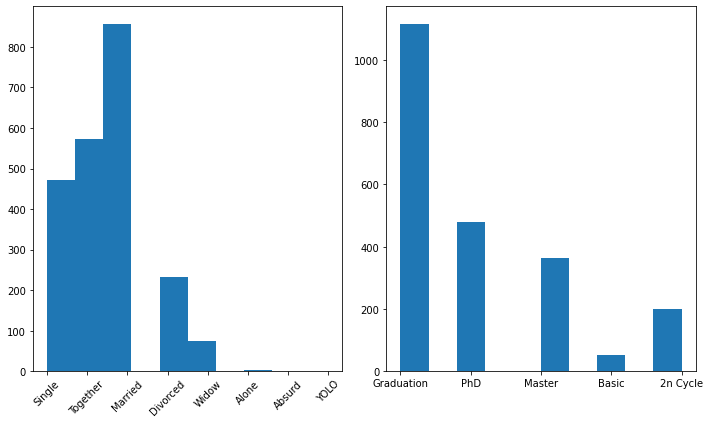

In [22]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax1.hist(obj_col['Marital_Status'])
ax1.set_xticklabels(obj_col['Marital_Status'].unique(), rotation=45)
ax2.hist(obj_col['Education'])
plt.tight_layout()

### fix marital_status so its simple

In [23]:
obj_col[target] = data[target]

<ipython-input-23-f68bf86d623b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_col[target] = data[target]


In [24]:
#pause

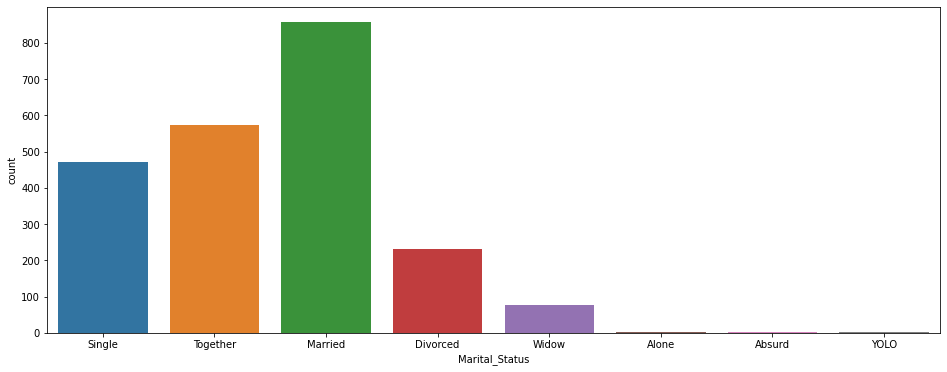

In [25]:
df = data.copy()
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='Marital_Status')
plt.show()

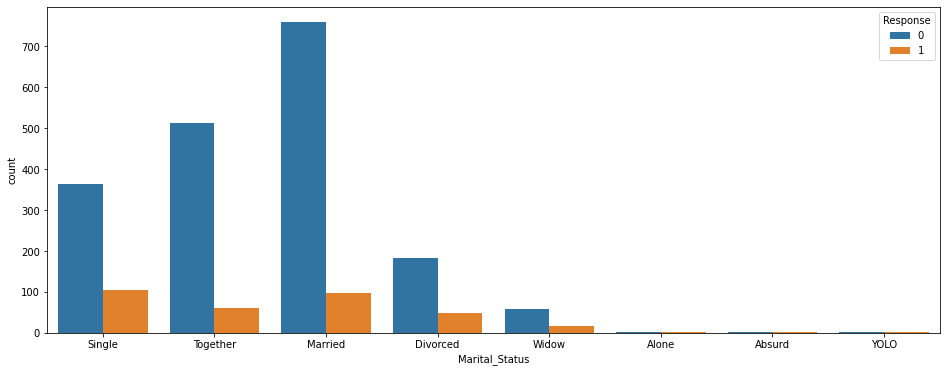

In [26]:
plt.figure(figsize=(16,6))
sns.countplot(data=obj_col,x='Marital_Status',hue=target)
plt.show()

In [27]:
# def new_marital(status):
#     if status == 'Single' or status =='Married':
#         return status
#     if status == 'Together':
#         return 'Married'
#     else:
#         return 'Single'

In [28]:
obj_col['Marital_Status'] = obj_col['Marital_Status'].apply(lambda x: new_marital(x))
data['Marital_Status'] = data['Marital_Status'].apply(lambda x: new_marital(x))

<ipython-input-28-375ee33c81f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_col['Marital_Status'] = obj_col['Marital_Status'].apply(lambda x: new_marital(x))


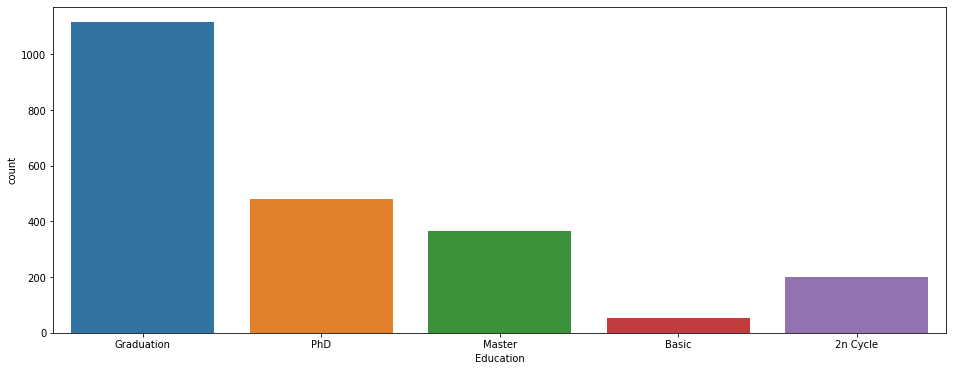

In [29]:
df = data.copy()
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='Education')
plt.show()

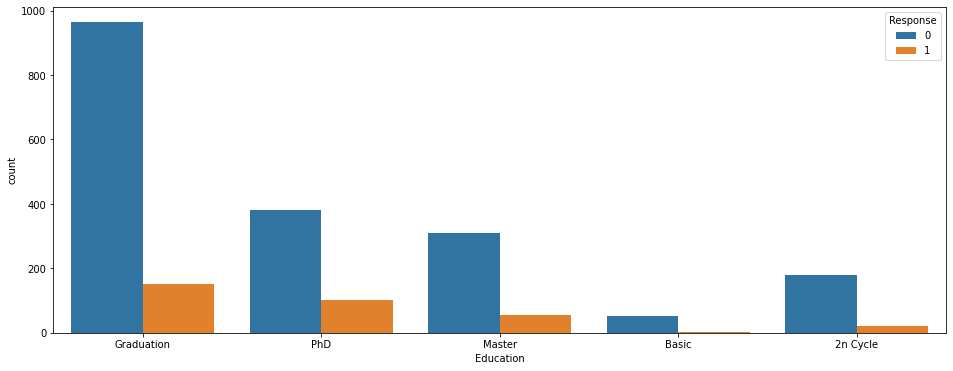

In [30]:
df = data.copy()
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='Education',hue=target)
plt.show()

In [31]:
obj_col['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [32]:
# def new_graduation(grad):
#     if grad in ['Graduation', 'PhD', 'Master']:
#         return 'Graduated'
#     else:
#         return 'None Graduated'

In [33]:
obj_col['Education'] = obj_col['Education'].apply(lambda x: new_graduation(x))

<ipython-input-33-267d4c971084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_col['Education'] = obj_col['Education'].apply(lambda x: new_graduation(x))


<ipython-input-34-58c14e734aab>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(obj_col['Marital_Status'].unique(), rotation=45)


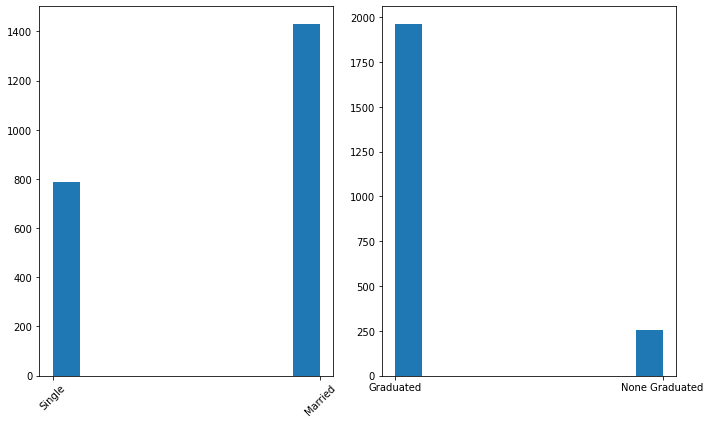

In [34]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax1.hist(obj_col['Marital_Status'])
ax1.set_xticklabels(obj_col['Marital_Status'].unique(), rotation=45)
ax2.hist(obj_col['Education'])
plt.tight_layout()

In [35]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [36]:
obj_col['Education']

0       Graduated
1       Graduated
2       Graduated
3       Graduated
4       Graduated
          ...    
2235    Graduated
2236    Graduated
2237    Graduated
2238    Graduated
2239    Graduated
Name: Education, Length: 2216, dtype: object

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [38]:
num_df = data[[x for x in data.columns if data[x].dtype != 'O']]
num_df.sample(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
583,5123,1951,27450.0,0,0,2013-04-15,57,37,12,23,8,11,52,1,2,1,3,7,0,0,0,0,0,0,3,11,0
1030,5204,1971,74538.0,0,0,2013-06-29,21,380,98,733,110,112,28,1,8,8,5,3,0,0,1,0,0,0,3,11,1


In [39]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Income               2216 non-null   float64       
 3   Kidhome              2216 non-null   int64         
 4   Teenhome             2216 non-null   int64         
 5   Dt_Customer          2216 non-null   datetime64[ns]
 6   Recency              2216 non-null   int64         
 7   MntWines             2216 non-null   int64         
 8   MntFruits            2216 non-null   int64         
 9   MntMeatProducts      2216 non-null   int64         
 10  MntFishProducts      2216 non-null   int64         
 11  MntSweetProducts     2216 non-null   int64         
 12  MntGoldProds         2216 non-null   int64         
 13  NumDealsPurchases    2216 non-nul

In [40]:
for x in num_df.columns:
    print(x,num_df[x].nunique())

ID 2216
Year_Birth 59
Income 1974
Kidhome 3
Teenhome 3
Dt_Customer 662
Recency 100
MntWines 776
MntFruits 158
MntMeatProducts 554
MntFishProducts 182
MntSweetProducts 176
MntGoldProds 212
NumDealsPurchases 15
NumWebPurchases 15
NumCatalogPurchases 14
NumStorePurchases 14
NumWebVisitsMonth 16
AcceptedCmp3 2
AcceptedCmp4 2
AcceptedCmp5 2
AcceptedCmp1 2
AcceptedCmp2 2
Complain 2
Z_CostContact 1
Z_Revenue 1
Response 2


In [41]:
cont_df = num_df[[x for x in num_df.columns if num_df[x].nunique() > 10]]
cont_df

,ID,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,58138.0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,46344.0,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,26646.0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5
2236,4001,1946,64014.0,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7
2237,7270,1981,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6
2238,8235,1956,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3


In [42]:
cont_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.00,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.00,24.5,56.00,321.0


In [43]:
cont_df.drop('ID',1,inplace=True)
data.drop('ID',1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
cont_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0
NumDealsPurchases,2216.0,2.323556,1.923716,0.0,1.0,2.0,3.00,15.0


In [45]:
max(cont_df['Year_Birth'])-min(cont_df['Year_Birth'])

103

## data have a 103 years of observations

<Figure size 720x432 with 0 Axes>

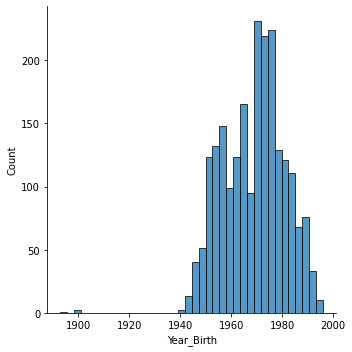

In [46]:
df = data.copy()
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Year_Birth')
plt.show()

<Figure size 720x432 with 0 Axes>

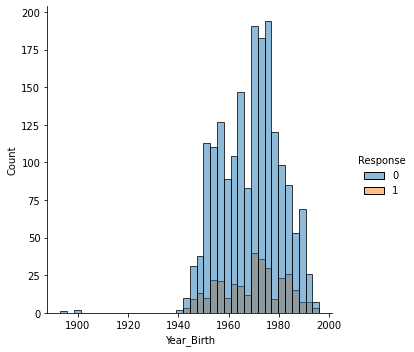

In [47]:
df = data.copy()
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Year_Birth',hue=target)
plt.show()

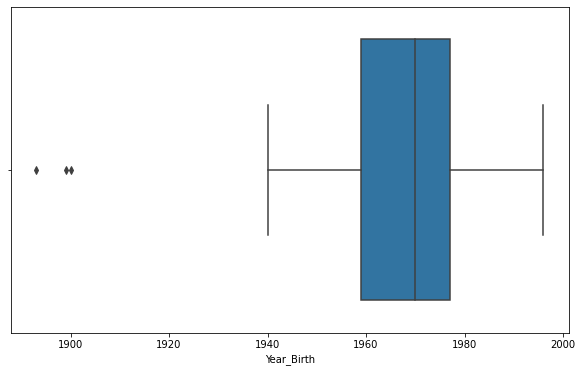

In [48]:
df = data.copy()
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Year_Birth')
plt.show()

In [49]:
# def normal_feature(data,x):
#     q1 = data[x].quantile(.25)
#     q3 = data[x].quantile(.85)
    
#     IQR = q3 - q1
    
#     IQR = IQR * 1.5
    
#     data = data[(data[x] < q3 + IQR) & (data[x] > q1 - IQR)]
    
#     return data

In [50]:
# stop

In [51]:
normal_feature(cont_df, 'Year_Birth',1).describe()


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,1968.917307,52236.581563,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432,2.325350,4.087664,2.671487,5.805242,5.321735
std,11.700216,25178.603047,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746,1.924402,2.741664,2.927096,3.250752,2.425092
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35246.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51373.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68487.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [52]:
cont_df = normal_feature(cont_df, 'Year_Birth',1)
data = normal_feature(data, 'Year_Birth')

In [53]:
cont_df['Current_year'] = cont_df['Dt_Customer'].dt.year
data['Current_year'] = data['Dt_Customer'].dt.year

<ipython-input-53-307d31227ead>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_df['Current_year'] = cont_df['Dt_Customer'].dt.year
<ipython-input-53-307d31227ead>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Current_year'] = data['Dt_Customer'].dt.year


In [54]:
# pause

In [55]:
def get_year(data):
    data['Age'] = data['Current_year'] - data['Year_Birth']
    return data

In [56]:
cont_df = get_year(cont_df)
data = get_year(data)


<ipython-input-55-f9c25208b51e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Current_year'] - data['Year_Birth']


In [57]:
cont_df.drop('Year_Birth',1,inplace=True)
data.drop('Year_Birth',1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<Figure size 720x432 with 0 Axes>

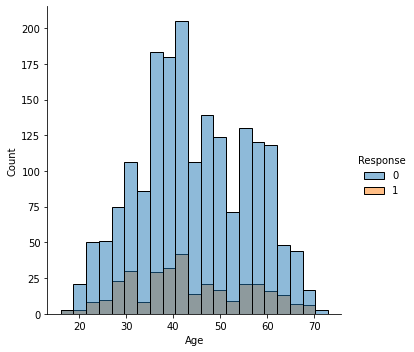

In [58]:
df = data.copy()
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Age',hue=target)
plt.show()

In [59]:
cont_df['Age'].describe()

count    2213.000000
mean       44.110709
std        11.736750
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64

In [60]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Income               2213 non-null   float64       
 1   Dt_Customer          2213 non-null   datetime64[ns]
 2   Recency              2213 non-null   int64         
 3   MntWines             2213 non-null   int64         
 4   MntFruits            2213 non-null   int64         
 5   MntMeatProducts      2213 non-null   int64         
 6   MntFishProducts      2213 non-null   int64         
 7   MntSweetProducts     2213 non-null   int64         
 8   MntGoldProds         2213 non-null   int64         
 9   NumDealsPurchases    2213 non-null   int64         
 10  NumWebPurchases      2213 non-null   int64         
 11  NumCatalogPurchases  2213 non-null   int64         
 12  NumStorePurchases    2213 non-null   int64         
 13  NumWebVisitsMonth    2213 non-nul

In [61]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Income               2213 non-null   float64       
 1   Dt_Customer          2213 non-null   datetime64[ns]
 2   Recency              2213 non-null   int64         
 3   MntWines             2213 non-null   int64         
 4   MntFruits            2213 non-null   int64         
 5   MntMeatProducts      2213 non-null   int64         
 6   MntFishProducts      2213 non-null   int64         
 7   MntSweetProducts     2213 non-null   int64         
 8   MntGoldProds         2213 non-null   int64         
 9   NumDealsPurchases    2213 non-null   int64         
 10  NumWebPurchases      2213 non-null   int64         
 11  NumCatalogPurchases  2213 non-null   int64         
 12  NumStorePurchases    2213 non-null   int64         
 13  NumWebVisitsMonth    2213 non-nul

In [62]:
cont_df['Recency'].describe()

count    2213.000000
mean       49.007682
std        28.941864
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

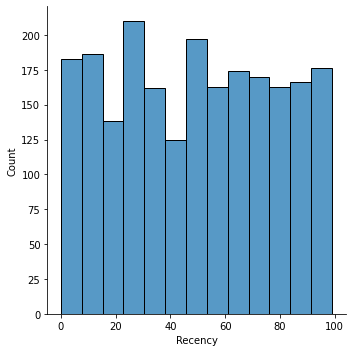

In [63]:
sns.displot(data=cont_df,x='Recency')

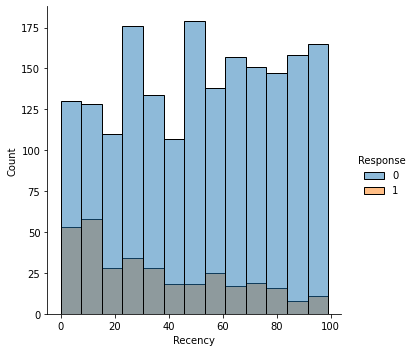

In [64]:
df = data.copy()
sns.displot(data=df,x='Recency',hue=target)

In [65]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Income               2213 non-null   float64       
 1   Dt_Customer          2213 non-null   datetime64[ns]
 2   Recency              2213 non-null   int64         
 3   MntWines             2213 non-null   int64         
 4   MntFruits            2213 non-null   int64         
 5   MntMeatProducts      2213 non-null   int64         
 6   MntFishProducts      2213 non-null   int64         
 7   MntSweetProducts     2213 non-null   int64         
 8   MntGoldProds         2213 non-null   int64         
 9   NumDealsPurchases    2213 non-null   int64         
 10  NumWebPurchases      2213 non-null   int64         
 11  NumCatalogPurchases  2213 non-null   int64         
 12  NumStorePurchases    2213 non-null   int64         
 13  NumWebVisitsMonth    2213 non-nul

In [66]:
cont_df['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [67]:
cont_df = normal_feature(cont_df,'Income')
data = normal_feature(data,'Income')

In [68]:
dir()

['In',
 'Out',
 '_',
 '_10',
 '_12',
 '_15',
 '_16',
 '_20',
 '_3',
 '_31',
 '_35',
 '_36',
 '_38',
 '_41',
 '_42',
 '_44',
 '_45',
 '_51',
 '_59',
 '_6',
 '_62',
 '_63',
 '_64',
 '_66',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i60',
 '_i61',
 '_i62',
 '_i63',
 '_i64',
 '_i65',
 '_i66',
 '_i67',
 '_i68',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'ax1',
 'ax2',
 'cont_d

In [69]:
mnt_df = data[[x for x in data.columns if 'Mnt' in x]]
mnt_df

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


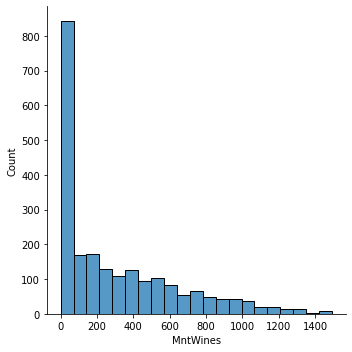

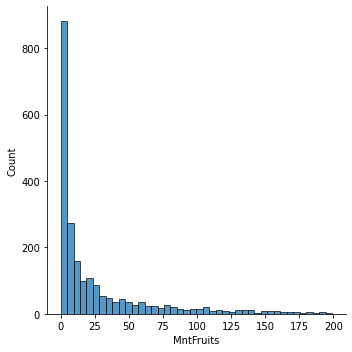

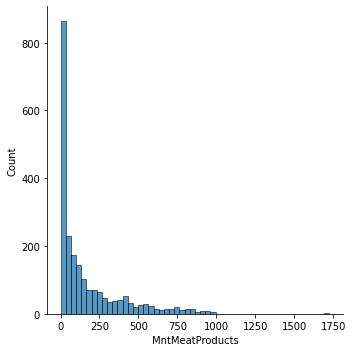

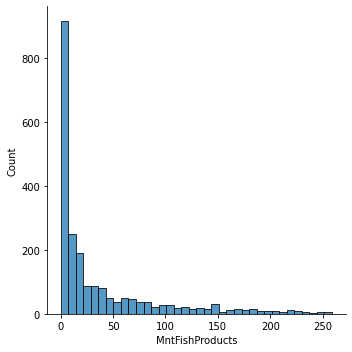

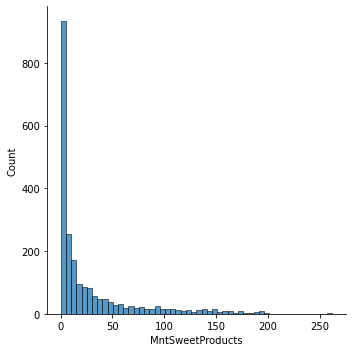

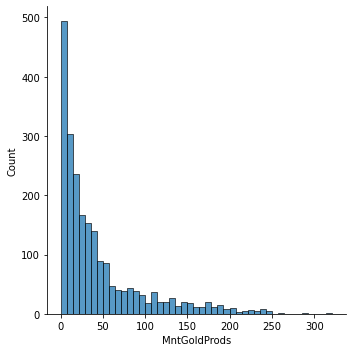

In [70]:
for x in mnt_df.columns:
    sns.displot(data=mnt_df, x = x)
    plt.show()

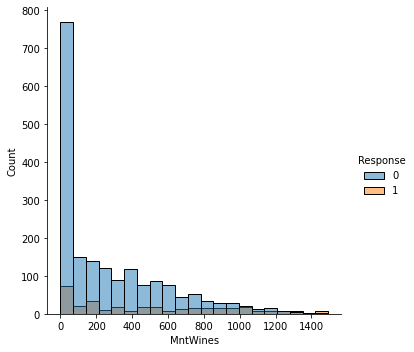

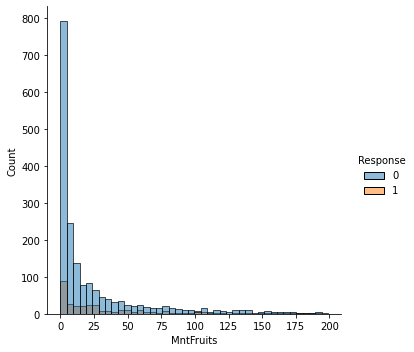

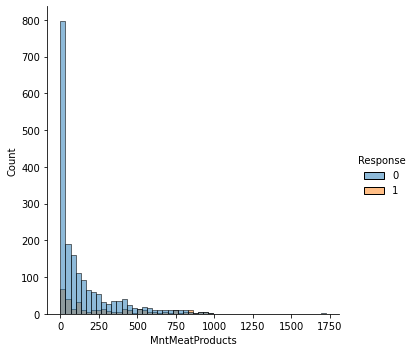

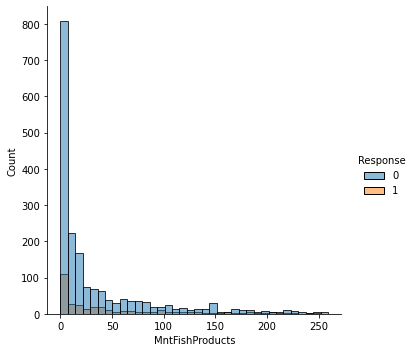

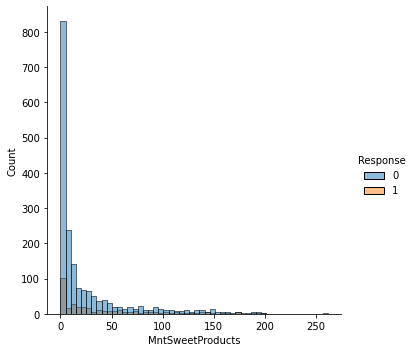

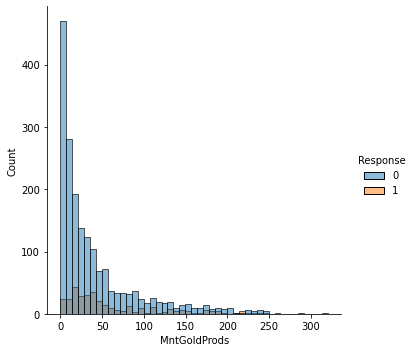

In [71]:
for x in mnt_df.columns:
    df = data.copy()
    sns.displot(data=df, x = x, hue=target)
    plt.show()

<Figure size 1152x432 with 0 Axes>

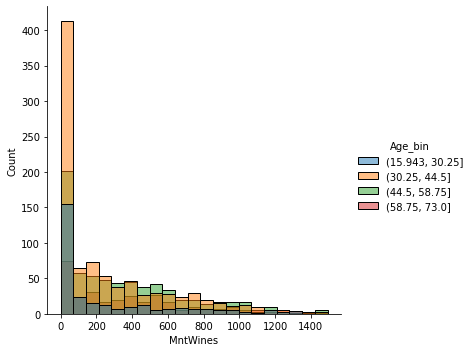

<Figure size 1152x432 with 0 Axes>

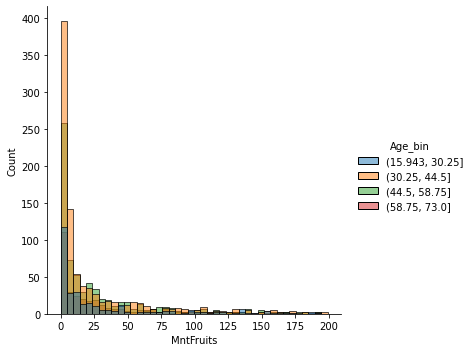

<Figure size 1152x432 with 0 Axes>

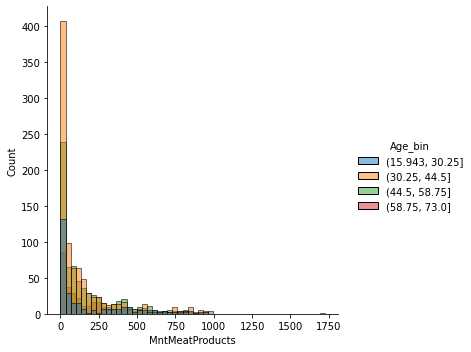

<Figure size 1152x432 with 0 Axes>

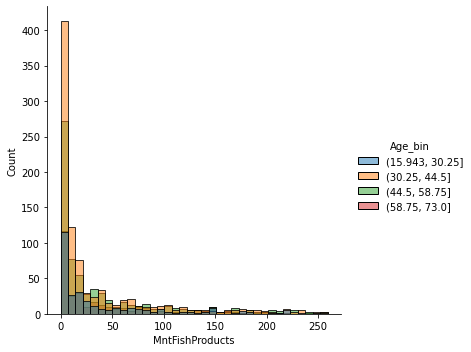

<Figure size 1152x432 with 0 Axes>

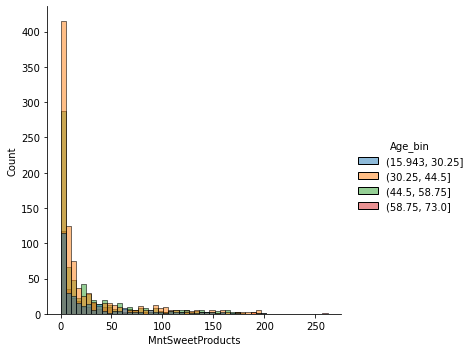

<Figure size 1152x432 with 0 Axes>

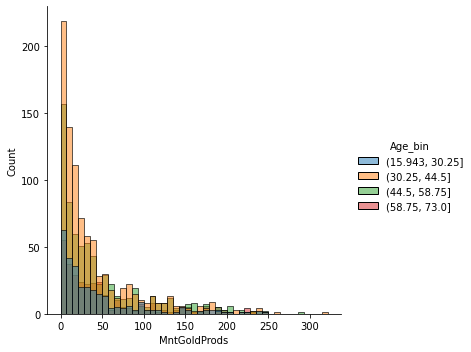

In [72]:
df = data.copy()
df['Age_bin'] = pd.cut(df['Age'],bins=4)
    
for x in mnt_df.columns:
    plt.figure(figsize=(16,6))
    sns.displot(data=df, x = x, hue='Age_bin')
    plt.show()

In [73]:
numdf = data[[x for x in data.columns if 'Num' in x]]
numdf

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,8,10,4,7
1,2,1,1,2,5
2,1,8,2,10,4
3,2,2,0,4,6
4,5,5,3,6,5
...,...,...,...,...,...
2235,2,9,3,4,5
2236,7,8,2,5,7
2237,1,2,3,13,6
2238,2,6,5,10,3


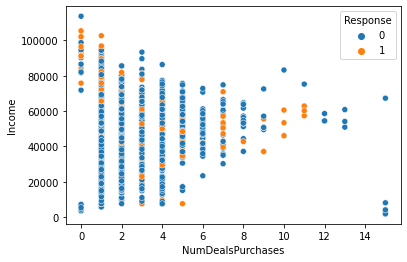

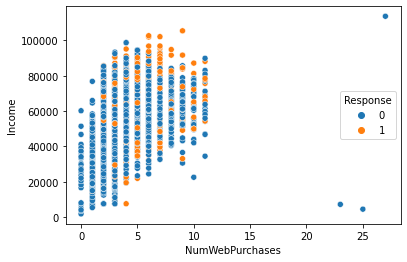

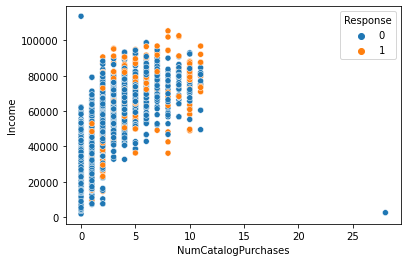

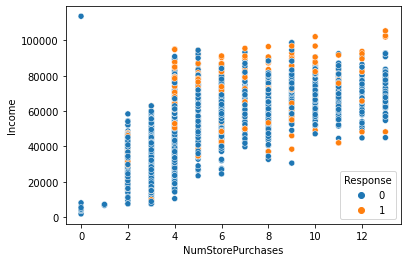

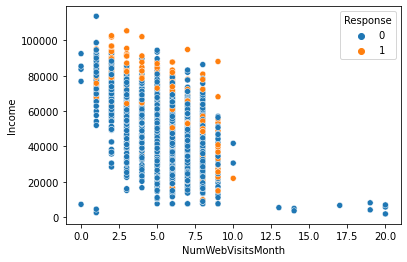

In [74]:
for x in numdf.columns:
    df = data.copy()
    sns.scatterplot(data=df, x = x, y='Income',hue=target)
    plt.show()

In [75]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Current_year,Age
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,55
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,60
2,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,48
3,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,30
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,46
2236,PhD,Married,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,68
2237,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,33
2238,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,58


In [76]:
df['Age_bin'] = pd.cut(df['Age'],bins=4)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_bin', ylabel='count'>

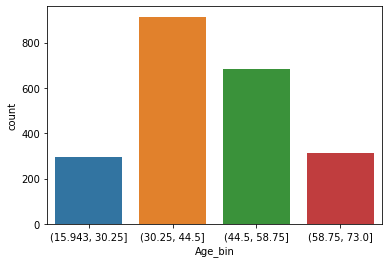

In [77]:
sns.countplot(df['Age_bin'])

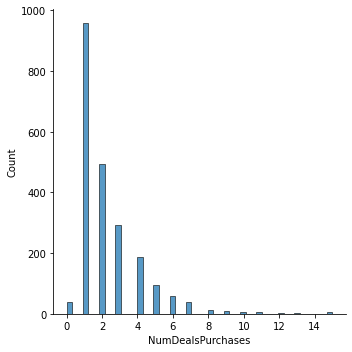

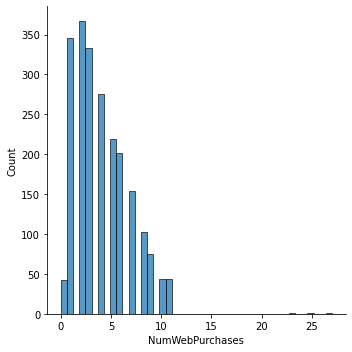

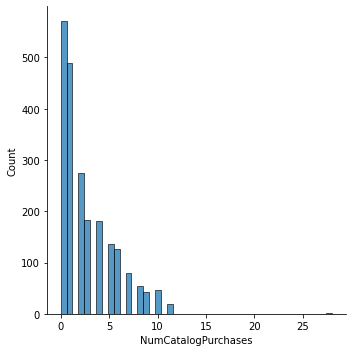

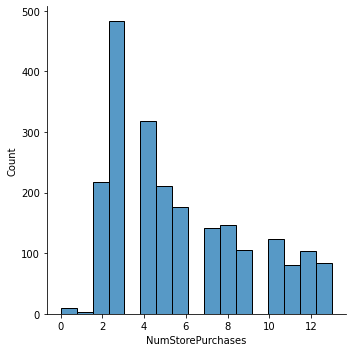

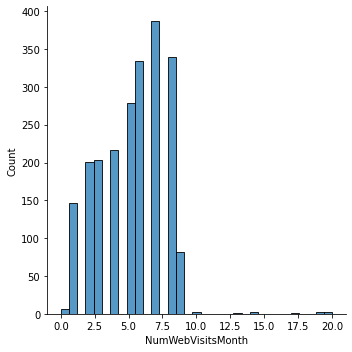

In [78]:
for x in numdf.columns:
    sns.displot(data=numdf, x = x)
    plt.show()

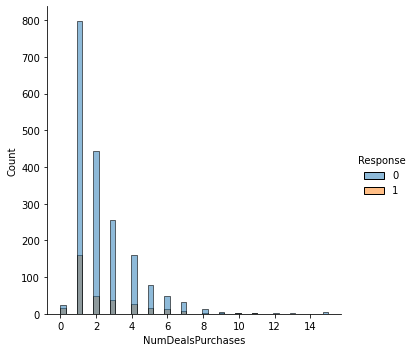

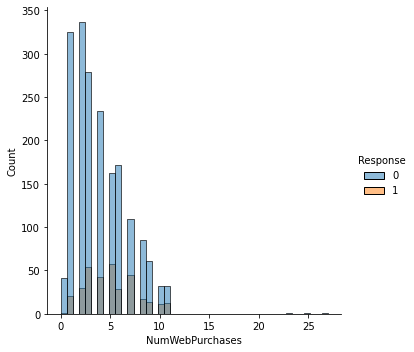

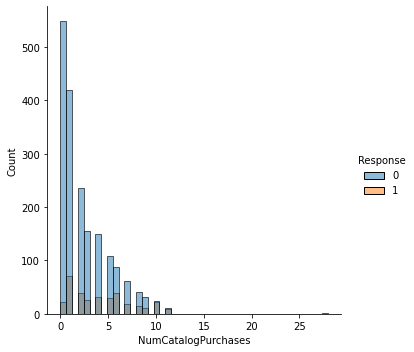

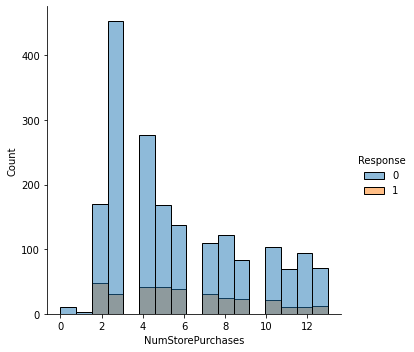

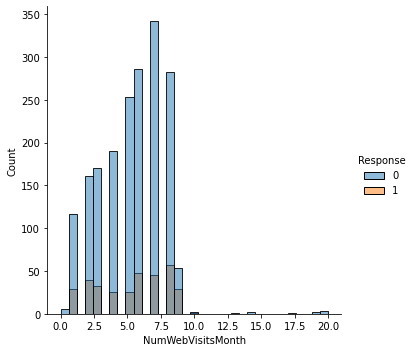

In [79]:
for x in numdf.columns:
    df = data.copy()
    sns.displot(data=df, x = x, hue=target)
    plt.show()

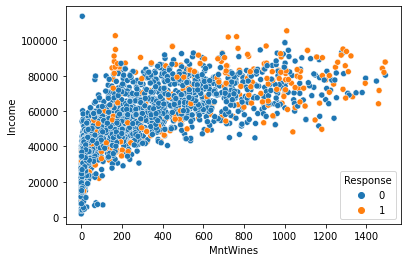

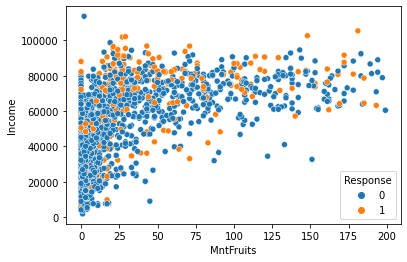

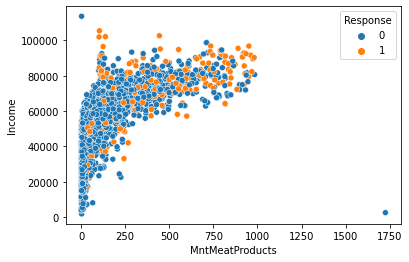

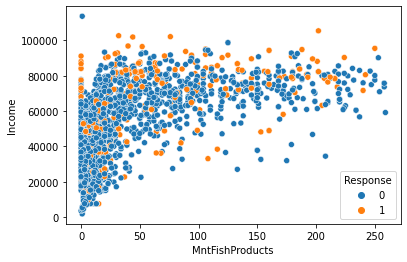

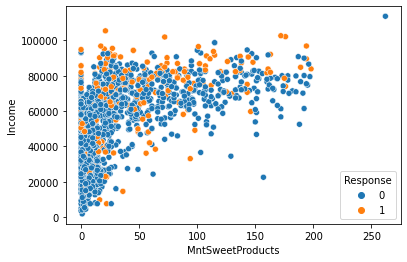

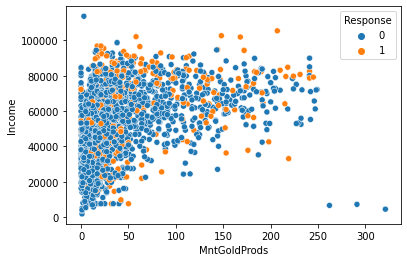

In [80]:
for x in mnt_df.columns:
    df = data.copy()
    sns.scatterplot(data=df, x = x, y='Income',hue=target)
    plt.show()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2205 non-null   object        
 1   Marital_Status       2205 non-null   object        
 2   Income               2205 non-null   float64       
 3   Kidhome              2205 non-null   int64         
 4   Teenhome             2205 non-null   int64         
 5   Dt_Customer          2205 non-null   datetime64[ns]
 6   Recency              2205 non-null   int64         
 7   MntWines             2205 non-null   int64         
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   int64         
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   int64         
 13  NumDealsPurchases    2205 non-nul

In [82]:
accept_df = data[[  x for x in data.columns if 'Accepted' in x]]
accept_df

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0


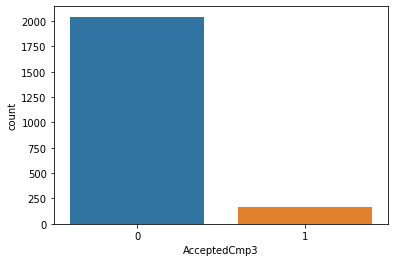

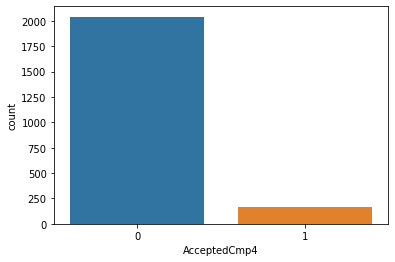

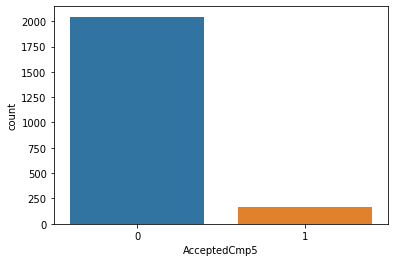

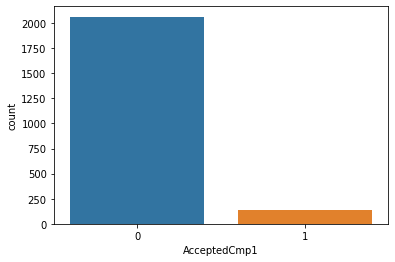

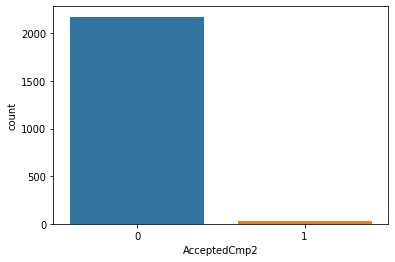

In [83]:
for x in accept_df.columns:
    sns.countplot(data=accept_df,x=x)
    plt.show()

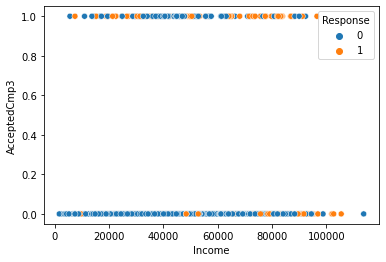

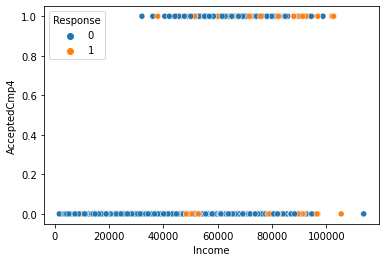

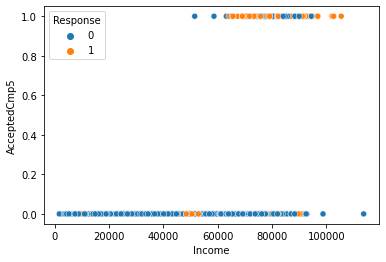

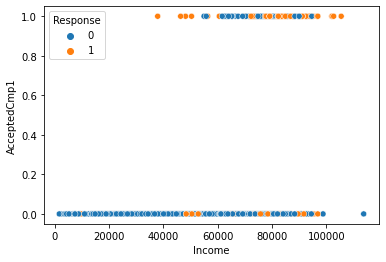

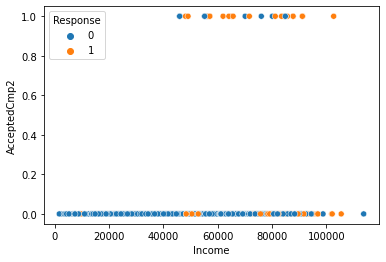

In [84]:
for x in accept_df.columns:
    df = data.copy()
    sns.scatterplot(data=df,y=x, x = 'Income',hue=target)
    plt.show()

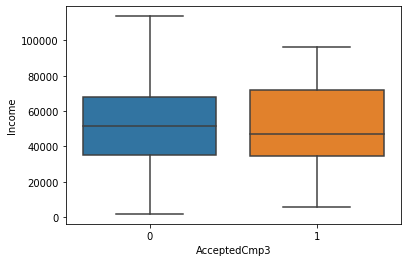

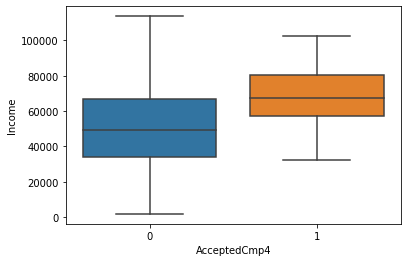

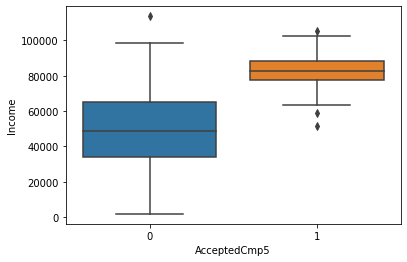

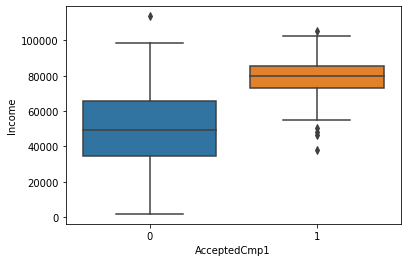

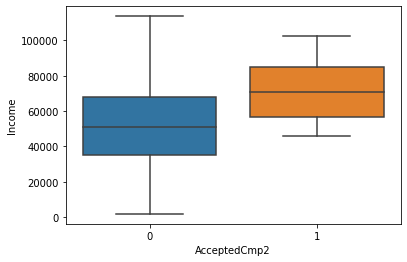

In [85]:
for i in accept_df.columns:
    df = data.copy()
    sns.boxplot(data=df,x = i,y='Income')
    plt.show()

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2205 non-null   object        
 1   Marital_Status       2205 non-null   object        
 2   Income               2205 non-null   float64       
 3   Kidhome              2205 non-null   int64         
 4   Teenhome             2205 non-null   int64         
 5   Dt_Customer          2205 non-null   datetime64[ns]
 6   Recency              2205 non-null   int64         
 7   MntWines             2205 non-null   int64         
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   int64         
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   int64         
 13  NumDealsPurchases    2205 non-nul

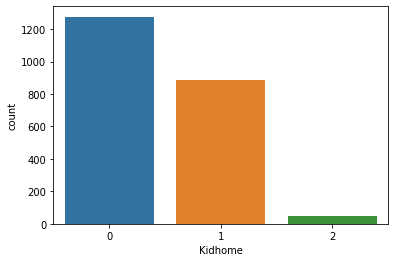

In [87]:
sns.countplot(data=data,x='Kidhome')
plt.show()

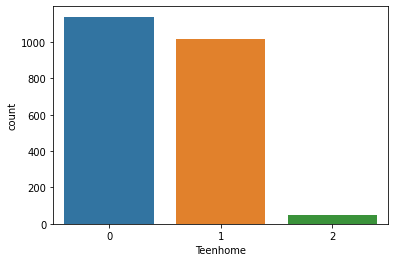

In [88]:
sns.countplot(data=data,x='Teenhome')
plt.show()

In [89]:
data['AmtChildren'] = data['Kidhome'] + data['Teenhome']

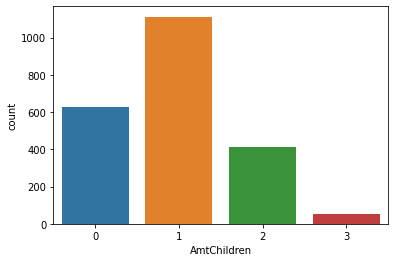

In [90]:
sns.countplot(data=data,x='AmtChildren')
plt.show()

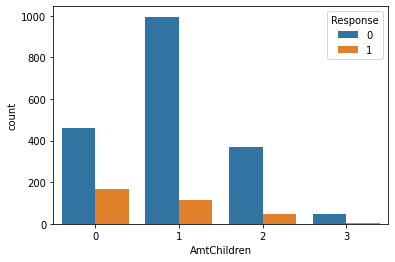

In [91]:
sns.countplot(data=data,x='AmtChildren',hue=target)
plt.show()

In [92]:
data['is_parent'] = np.where(data['AmtChildren'] == 0,0,1)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2205 non-null   object        
 1   Marital_Status       2205 non-null   object        
 2   Income               2205 non-null   float64       
 3   Kidhome              2205 non-null   int64         
 4   Teenhome             2205 non-null   int64         
 5   Dt_Customer          2205 non-null   datetime64[ns]
 6   Recency              2205 non-null   int64         
 7   MntWines             2205 non-null   int64         
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   int64         
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   int64         
 13  NumDealsPurchases    2205 non-nul

In [94]:
data['TotalCmp']= data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']





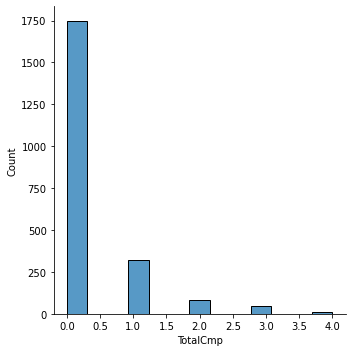

In [95]:
sns.displot(data=data,x='TotalCmp')

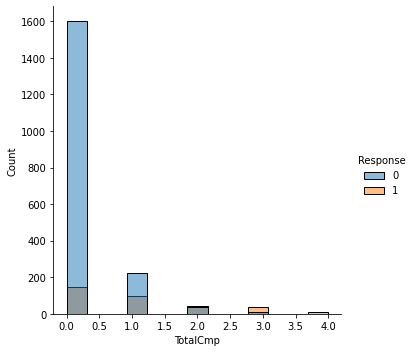

In [96]:
sns.displot(data=data,x='TotalCmp',hue=target)

<AxesSubplot:xlabel='TotalCmp', ylabel='count'>

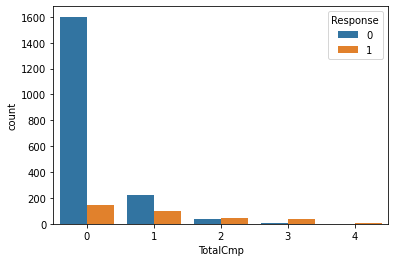

In [97]:
sns.countplot(data=data,x='TotalCmp',hue=target)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2205 non-null   object        
 1   Marital_Status       2205 non-null   object        
 2   Income               2205 non-null   float64       
 3   Kidhome              2205 non-null   int64         
 4   Teenhome             2205 non-null   int64         
 5   Dt_Customer          2205 non-null   datetime64[ns]
 6   Recency              2205 non-null   int64         
 7   MntWines             2205 non-null   int64         
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   int64         
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   int64         
 13  NumDealsPurchases    2205 non-nul

In [99]:
purchase = data[[x for x in data.columns if 'Num' in x]]
purchase

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,8,10,4,7
1,2,1,1,2,5
2,1,8,2,10,4
3,2,2,0,4,6
4,5,5,3,6,5
...,...,...,...,...,...
2235,2,9,3,4,5
2236,7,8,2,5,7
2237,1,2,3,13,6
2238,2,6,5,10,3


In [100]:
data['Total_Purchase'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumWebVisitsMonth']




<AxesSubplot:xlabel='Total_Purchase', ylabel='Income'>

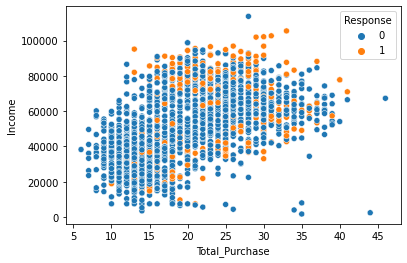

In [101]:
sns.scatterplot(data=data, x='Total_Purchase',y = 'Income', hue=target)

<AxesSubplot:xlabel='Total_Purchase', ylabel='TotalCmp'>

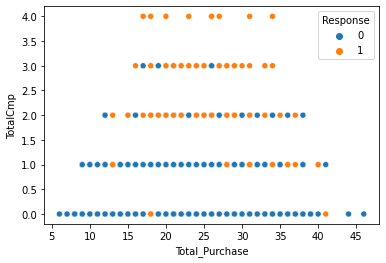

In [102]:
sns.scatterplot(data=data, x='Total_Purchase',y = 'TotalCmp', hue=target)

<AxesSubplot:xlabel='Total_Purchase', ylabel='Age'>

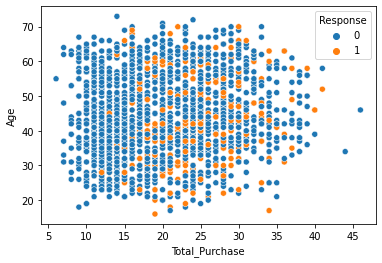

In [103]:
sns.scatterplot(data=data, x='Total_Purchase',y = 'Age', hue=target)

<AxesSubplot:xlabel='Total_Purchase', ylabel='AmtChildren'>

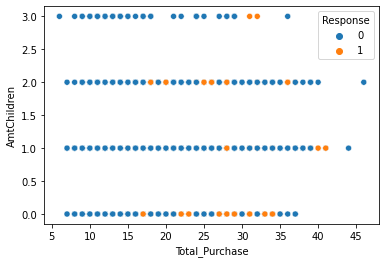

In [104]:
sns.scatterplot(data=data, x='Total_Purchase',y = 'AmtChildren', hue=target)

<AxesSubplot:>

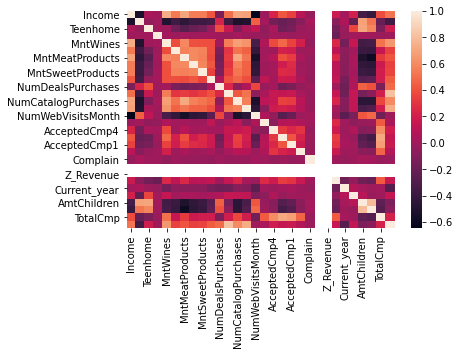

In [105]:
sns.heatmap(data.corr())

In [106]:
data.sample(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Current_year,Age,AmtChildren,is_parent,TotalCmp,Total_Purchase
554,Master,Married,81698.0,0,0,2013-06-11,4,179,28,520,111,123,47,1,3,8,13,1,0,0,0,0,0,0,3,11,1,2013,64,0,0,0,26
2176,Master,Single,81380.0,0,0,2012-12-22,51,741,68,689,224,68,103,1,4,2,10,2,0,0,0,0,0,0,3,11,0,2012,45,0,0,0,19
793,Graduation,Married,51267.0,1,1,2013-10-29,37,183,2,64,7,2,12,4,3,3,5,4,0,0,0,0,0,0,3,11,0,2013,35,2,1,0,19
381,Graduation,Married,19986.0,1,0,2013-11-14,74,3,6,5,0,2,6,1,0,0,3,7,0,0,0,0,0,0,3,11,0,2013,28,1,1,0,11
297,Master,Married,42386.0,1,0,2013-01-13,43,65,4,16,0,4,11,1,3,0,3,8,0,0,0,0,0,0,3,11,0,2013,27,1,1,0,15
1631,PhD,Married,42731.0,1,0,2013-10-21,64,159,2,51,6,2,24,3,4,1,5,5,0,0,0,0,0,0,3,11,0,2013,44,1,1,0,18
2172,Graduation,Married,60934.0,0,1,2014-01-17,41,224,155,155,192,93,54,2,6,4,11,4,0,0,0,0,0,0,3,11,0,2014,39,1,1,0,27
588,Graduation,Married,53863.0,0,1,2014-05-17,4,399,4,30,6,4,30,3,7,1,7,7,0,1,0,0,0,0,3,11,0,2014,59,1,1,1,25
1459,PhD,Married,38410.0,0,0,2012-09-14,65,153,64,123,116,64,14,2,5,2,9,6,0,0,0,0,0,0,3,11,1,2012,38,0,0,0,24
1194,Master,Married,43641.0,1,1,2013-04-22,50,57,2,51,4,2,23,3,2,1,4,6,0,0,0,0,0,0,3,11,0,2013,44,2,1,0,16


In [107]:
data['Z_CostContact']

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2205, dtype: int64

In [108]:
data.corr()[target].sort_values(ascending=True)[:-3]

is_parent             -0.205308
Recency               -0.200413
Current_year          -0.172126
AmtChildren           -0.168976
Teenhome              -0.155196
Kidhome               -0.078409
Age                   -0.031296
NumWebVisitsMonth     -0.005358
Complain              -0.000273
NumDealsPurchases      0.004691
NumStorePurchases      0.033509
MntFishProducts        0.107405
MntSweetProducts       0.115326
MntFruits              0.122331
MntGoldProds           0.140210
NumWebPurchases        0.149699
Total_Purchase         0.162165
AcceptedCmp2           0.169128
Income                 0.174902
AcceptedCmp4           0.179727
NumCatalogPurchases    0.234524
MntWines               0.245559
MntMeatProducts        0.248821
AcceptedCmp3           0.253576
AcceptedCmp1           0.296978
AcceptedCmp5           0.324648
TotalCmp               0.426961
Name: Response, dtype: float64

<AxesSubplot:>

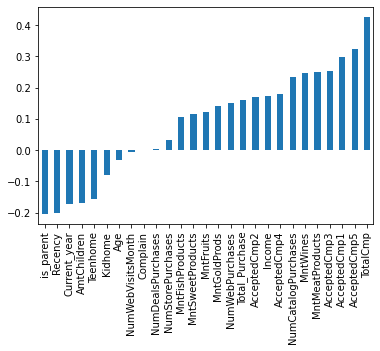

In [109]:
data.corr()[target].sort_values(ascending=True)[:-3].plot(kind='bar')

In [110]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Current_year',
       'Age', 'AmtChildren', 'is_parent', 'TotalCmp', 'Total_Purchase'],
      dtype='object')

In [111]:
df = data.copy()

In [112]:
df = pd.get_dummies(df,drop_first=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Income                 2205 non-null   float64       
 1   Kidhome                2205 non-null   int64         
 2   Teenhome               2205 non-null   int64         
 3   Dt_Customer            2205 non-null   datetime64[ns]
 4   Recency                2205 non-null   int64         
 5   MntWines               2205 non-null   int64         
 6   MntFruits              2205 non-null   int64         
 7   MntMeatProducts        2205 non-null   int64         
 8   MntFishProducts        2205 non-null   int64         
 9   MntSweetProducts       2205 non-null   int64         
 10  MntGoldProds           2205 non-null   int64         
 11  NumDealsPurchases      2205 non-null   int64         
 12  NumWebPurchases        2205 non-null   int64         
 13  Num

In [114]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Current_year', 'Age', 'AmtChildren', 'is_parent', 'TotalCmp',
       'Total_Purchase', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Single'],
      dtype='object')

In [160]:
X = df[[ 'Income', 'Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 
          'NumWebVisitsMonth', 'Complain','Age', 'AmtChildren', 'is_parent', 'TotalCmp','Total_Purchase','Education_Basic', 'Education_Graduation',
          'Education_Master', 'Education_PhD', 'Marital_Status_Single']]

y = df[target].values

In [161]:
#X,y

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=26)

In [164]:
X_train.shape

(1543, 24)

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
scaler = MinMaxScaler()

In [167]:
X_train = scaler.fit_transform(X_train)
X  = scaler.fit_transform(X)

In [168]:
X_test = scaler.transform(X_test)

In [169]:
# from sklearn.linear_model import RidgeClassifier, LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

In [170]:
from sklearn.decomposition import PCA

In [171]:
pca = PCA(3)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(X), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-5.155866e-17,0.594758,-1.122925,-0.540724,-0.011121,0.360061,1.477719
col2,2205.0,6.444832e-18,0.579287,-0.936052,-0.552940,0.071758,0.350793,1.353173
col3,2205.0,3.222416e-18,0.477926,-0.585608,-0.364543,-0.284529,0.591161,0.768283


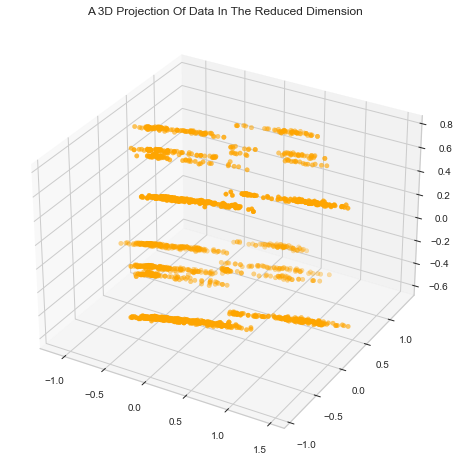

In [172]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="orange", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [173]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans,AgglomerativeClustering

Elbow Method to determine the number of clusters to be formed:


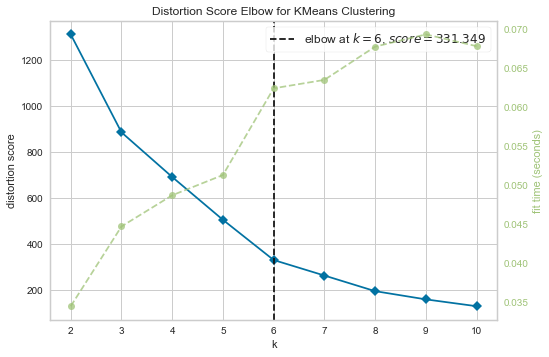

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [174]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [175]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=6)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [176]:
PCA_ds

,col1,col2,col3,Clusters
0,1.171858,0.188398,0.541333,0
1,-0.066239,-0.753737,0.712889,4
2,0.973526,0.078204,-0.436354,0
3,-0.048680,-0.763024,-0.286663,5
4,-0.633993,0.432235,-0.301254,1
...,...,...,...,...
2200,0.349195,-0.464768,-0.374814,5
2201,-0.891733,0.314598,-0.285087,1
2202,1.079333,0.169894,0.543940,0
2203,-0.357979,0.415519,-0.438849,1


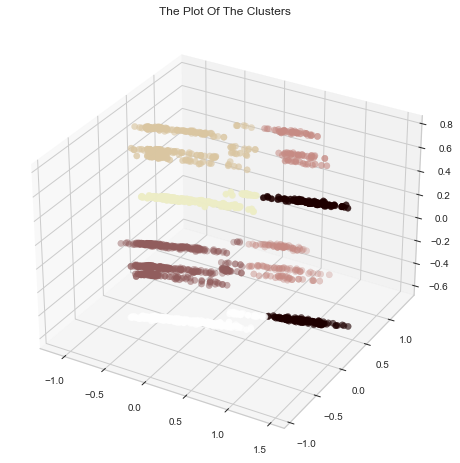

In [177]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'pink' )
ax.set_title("The Plot Of The Clusters")
plt.show()

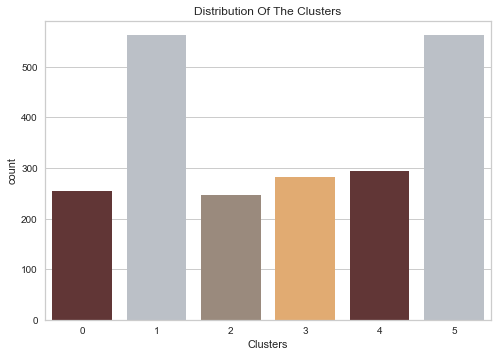

In [178]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [179]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Current_year', 'Age', 'AmtChildren', 'is_parent', 'TotalCmp',
       'Total_Purchase', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Single',
       'Clusters'],
      dtype='object')

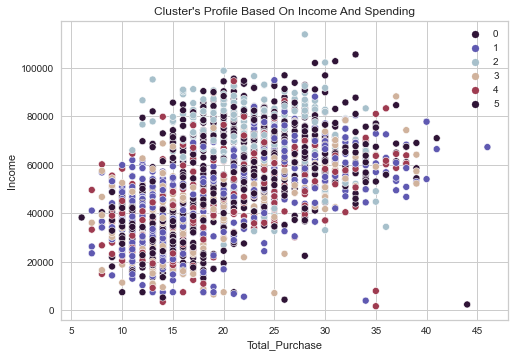

In [180]:
pl = sns.scatterplot(data = df,x="Total_Purchase", y="Income",hue="Clusters", palette= 'twilight_shifted')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Income                 2205 non-null   float64       
 1   Kidhome                2205 non-null   int64         
 2   Teenhome               2205 non-null   int64         
 3   Dt_Customer            2205 non-null   datetime64[ns]
 4   Recency                2205 non-null   int64         
 5   MntWines               2205 non-null   int64         
 6   MntFruits              2205 non-null   int64         
 7   MntMeatProducts        2205 non-null   int64         
 8   MntFishProducts        2205 non-null   int64         
 9   MntSweetProducts       2205 non-null   int64         
 10  MntGoldProds           2205 non-null   int64         
 11  NumDealsPurchases      2205 non-null   int64         
 12  NumWebPurchases        2205 non-null   int64         
 13  Num

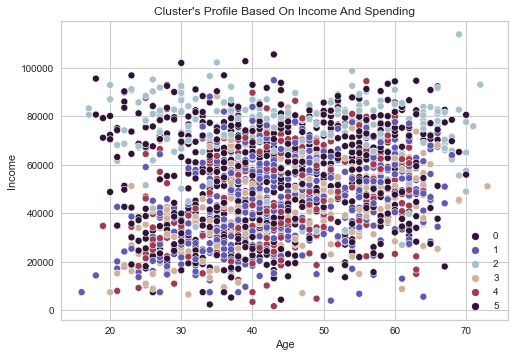

In [183]:
pl = sns.scatterplot(data = df,x="Age", y="Income",hue="Clusters", palette= 'twilight_shifted')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

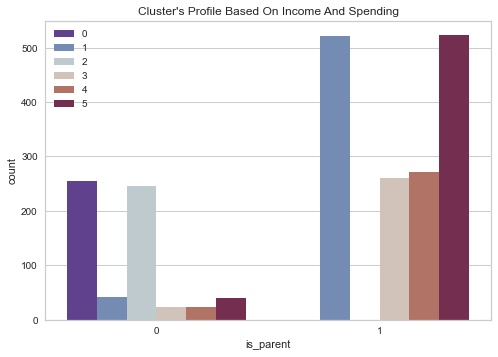

In [185]:
pl = sns.countplot(data = df,x="is_parent",hue="Clusters", palette= 'twilight_shifted')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

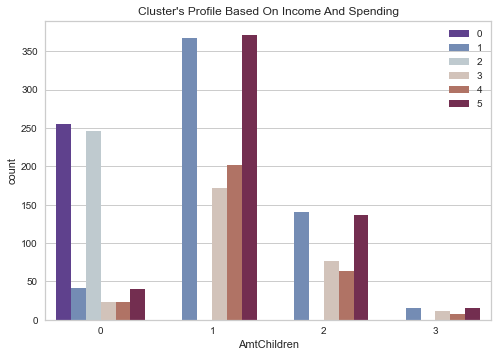

In [186]:
pl = sns.countplot(data = df,x="AmtChildren",hue="Clusters", palette= 'twilight_shifted')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()